In [1]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D
import numpy as np

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
M1 = Member_2D(member_number = 1, 
               nodes = {1:[0,0], 2:[0,10]},
               area = 4740/1000**2,
               inertia = 22.2e6 / 1000**4,
               elasticity= 200_000_000)
M1.Add_Load_Full_Uniform(24)

M2 = Member_2D(member_number = 2, 
               nodes = {2:[0,10], 3:[8,10]},
               area = 4740/1000**2,
               inertia = 22.2e6 / 1000**4,
               elasticity= 200_000_000)
M2.Add_Load_Point(75,4)

Frame = Frame_2D()
Frame.Compile_Frame_Member_Properties([M1,M2])
Frame.supports = {1:[1,1,1], 3:[1,1,0]}
Frame.Solve()

In [3]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0009551473094743467, -0.0005994873306511277, 0.02539096688679099],
 3: [0.0, 0.0, 0.02120070421488537]}

In [4]:
Frame.local_member_forces

{1: array([   0.,  120.,  200.,    0.,  120., -200.]),
 2: array([  0. ,  37.5,  75. ,   0. ,  37.5, -75. ])}

In [5]:
Frame.solved_member_forces

{1: array([ 56.83139895,   6.81504383,  22.80162984, -56.83139895,
         -6.81504383,  45.34880843]),
 2: array([ 113.18495617,   19.33139895,   79.65119157, -113.18495617,
         -19.33139895,   75.        ])}

In [6]:
Frame.local_member_forces_solved_

{1: array([  56.83139895,  126.81504383,  222.80162984,  -56.83139895,
         113.18495617, -154.65119157]),
 2: array([ 113.18495617,   56.83139895,  154.65119157, -113.18495617,
          18.16860105,    0.        ])}

In [7]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0009551473094743467, -0.0005994873306511277, 0.02539096688679099],
 3: [0.0, 0.0, 0.02120070421488537]}

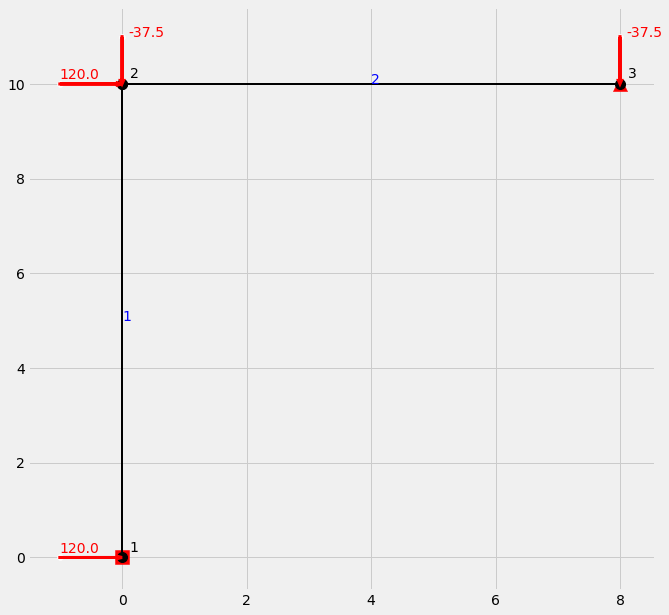

In [8]:
Frame.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3)

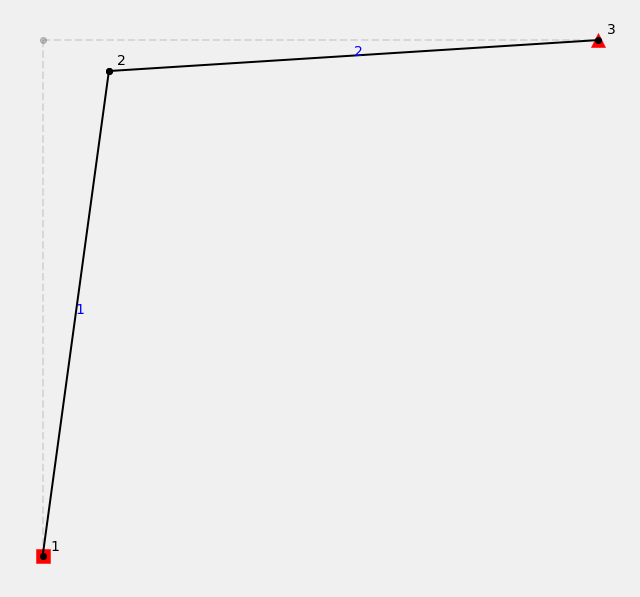

In [9]:
Frame.Draw_Frame_Displacements(figure_size=[10,10], magnification_factor=1000)

In [10]:
Frame.reactions_

{1: [-126.81504, 56.8314, 222.80163], 3: [-113.18496, 18.1686, 0.0]}

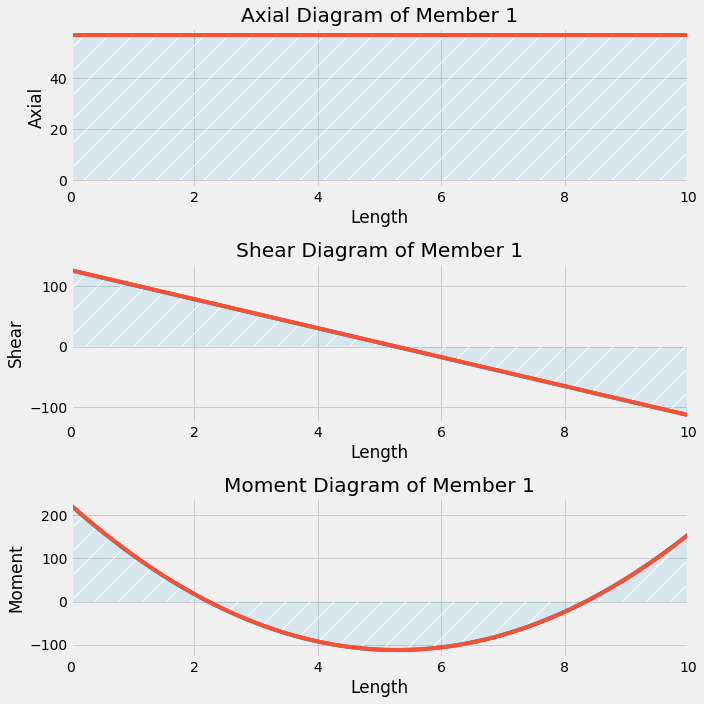

In [11]:
M1.Plot_Diagrams()

In [12]:
M1.Summary()

At Left End:
Axial: 56.83139894572691
Shear: 126.81504382728991
Moment: 222.80162983871438

At Right End:
Axial: 56.83139894572691
Shear: -113.18495617271009
Moment: 154.65119156581525

Minimum and Maximum
Minimum Shear: -113.18495617271009
Maximum Shear: 126.81504382728991
Minimum Moment: -112.23529575881724
Maximum Moment: 222.80162983871438


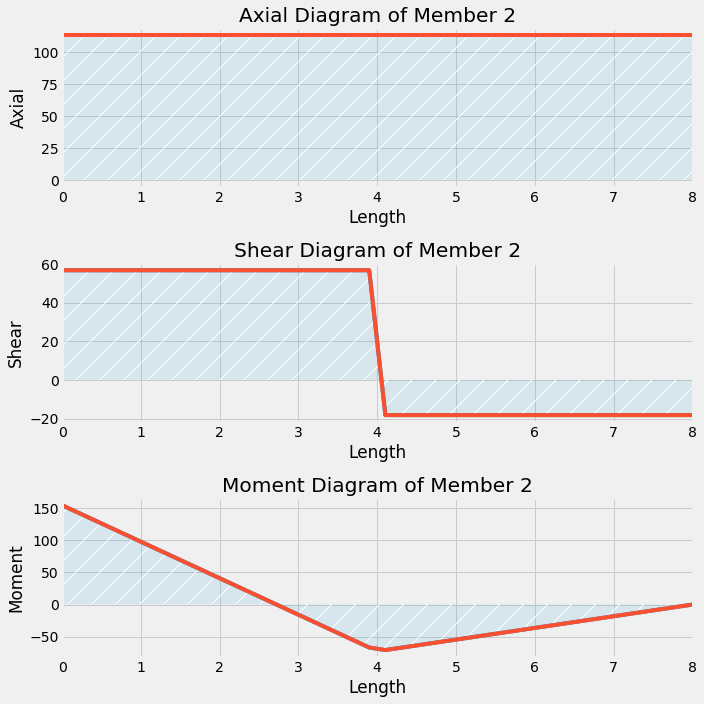

In [13]:
M2.Plot_Diagrams()

In [14]:
M2.Summary()

At Left End:
Axial: 113.18495617271009
Shear: 56.8313989457269
Moment: 154.65119156581522

At Right End:
Axial: 113.18495617271009
Shear: -18.168601054273097
Moment: 0.0

Minimum and Maximum
Minimum Shear: -18.168601054273097
Maximum Shear: 56.8313989457269
Minimum Moment: -70.81095795511567
Maximum Moment: 154.65119156581522
